In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [2]:
with open('dracula.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [3]:
words = text.split()

Tokenization

In [5]:
word_counts =  {}
for word in words:
    word = word.strip('.,!?()[]{}"\'*').lower()
    if word:
        if word in word_counts: word_counts[word] += 1
        else: word_counts[word] = 1

In [6]:
sorted_word_counts = dict(sorted(word_counts.items(), 
                                 key=lambda item: item[1], 
                                 reverse=True)[:50])
df = pd.DataFrame(list(sorted_word_counts.items()), 
                  columns=['Word', 'Frequency'])

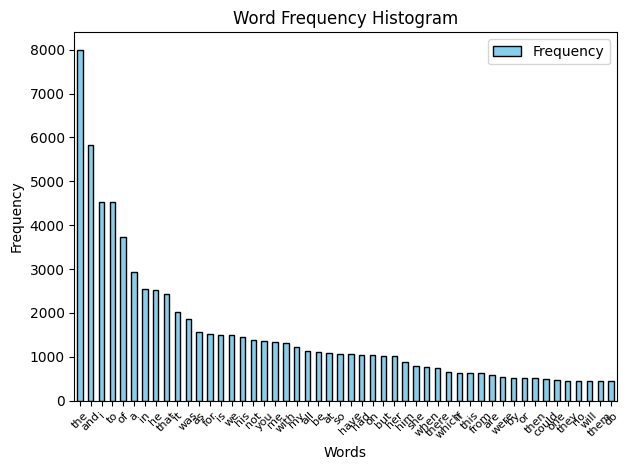

In [8]:
df.plot(kind='bar', x='Word', y='Frequency', 
        color='skyblue', edgecolor='black')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Histogram')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

Removing stop words

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [11]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [12]:
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stop_words}

In [13]:
filtered_word_counts_sorted = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True)[:50])

In [14]:
filtered_df = pd.DataFrame(list(filtered_word_counts_sorted.items()), columns=['Word', 'Frequency'])

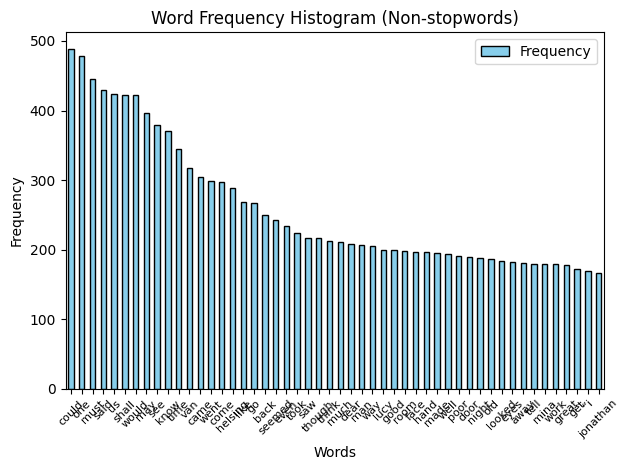

In [15]:
filtered_df.plot(kind='bar', x='Word', y='Frequency', color='skyblue', edgecolor='black')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Histogram (Non-stopwords)')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

Stemming

In [17]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [18]:
stemmer = PorterStemmer()

In [19]:
stemmed_word_counts = {}

In [20]:
for word in filtered_word_counts:
    stemmed_word = stemmer.stem(word)
    if stemmed_word in stemmed_word_counts: stemmed_word_counts[stemmed_word] += filtered_word_counts[word]
    else: stemmed_word_counts[stemmed_word] = filtered_word_counts[word]

In [21]:
stemmed_word_counts_sorted = dict(sorted(stemmed_word_counts.items(), key=lambda item:item[1], reverse=True)[:50])

In [22]:
stemmed_df = pd.DataFrame(stemmed_word_counts_sorted.items(), columns=['Word', 'Frequency'])

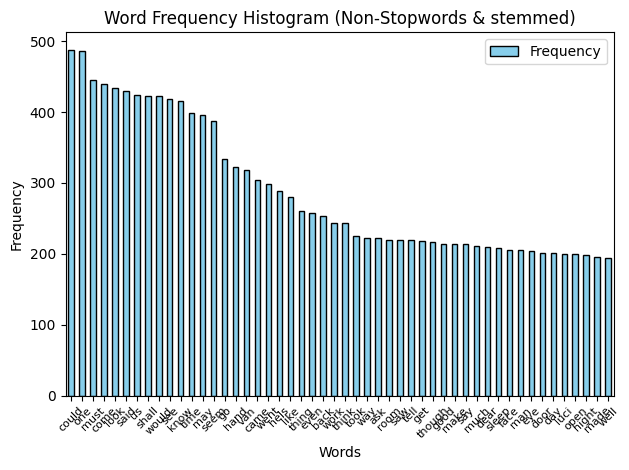

In [23]:
stemmed_df.plot(kind='bar', x='Word', y='Frequency', color='skyblue', edgecolor='black')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Histogram (Non-Stopwords & stemmed)')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

Creating wordcloud

In [25]:
wordcloud_word_count = dict(sorted(stemmed_word_counts.items(), key=lambda item:item[1], reverse=True))

In [26]:
wordcloud_df = pd.DataFrame(wordcloud_word_count.items(), columns=['Word', 'Frequency'])

In [27]:
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(wordcloud_df.set_index('Word')['Frequency'].to_dict())

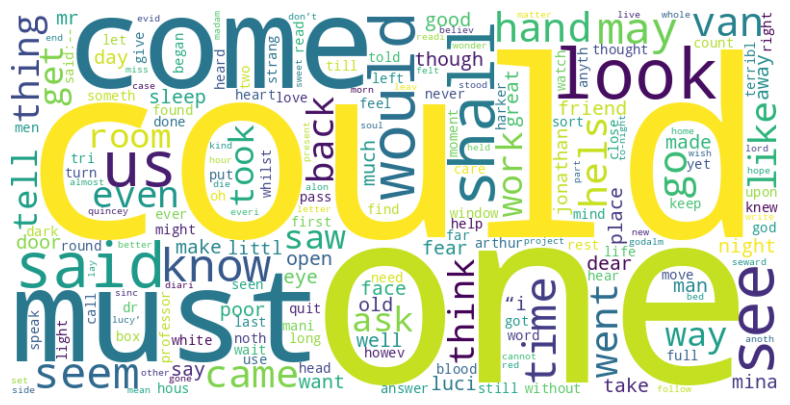

In [28]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Ranking Words according to frequency: Zipf's Law

In [29]:
words_counts_ranked = dict(sorted(stemmed_word_counts.items(), key=lambda item: item[1], reverse=True))

In [96]:
ranked_df = pd.DataFrame(list(words_counts_ranked.items()), columns=['Word', 'Frequency'])

In [97]:
ranked_df.insert(loc=2, column='Rank', value=range(1, len(words_counts_ranked.items()) + 1))

In [98]:
log_ranked_df = ranked_df.copy()
log_ranked_df['Rank'] = np.log(ranked_df['Rank'])
log_ranked_df['Frequency'] = np.log(ranked_df['Frequency'])

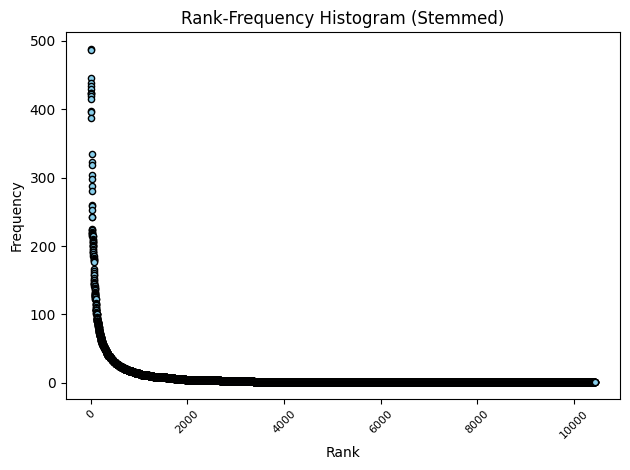

In [99]:
ranked_df.plot(kind='scatter', x='Rank', y='Frequency', color='skyblue', edgecolor='black')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

Method of least squares to find slop and intercept

In [101]:
A = log_ranked_df['Rank'].values
maxValue = A[-1]

In [102]:
A = np.column_stack((A, np.ones(len(A), dtype='int64')))

In [103]:
b = np.array(log_ranked_df['Frequency'].values, dtype='int64')

In [104]:
[m, c] = np.linalg.inv(A.T @ A) @ A.T @ b

In [105]:
alpha, corpus_constant = - m, np.exp(c)

In [106]:
x = np.linspace(0, maxValue,1000)
y = m * x + c

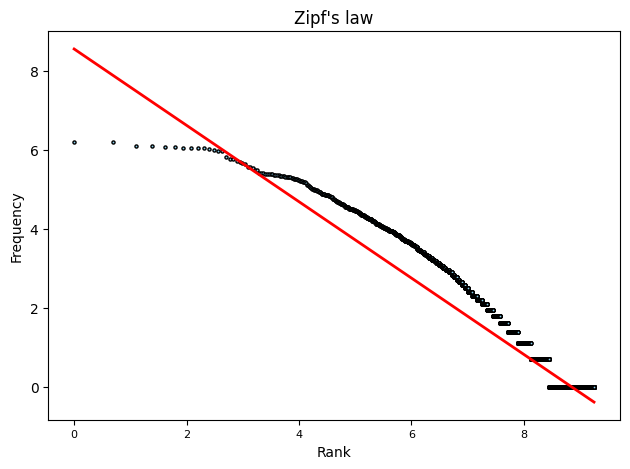

In [110]:
log_ranked_df.plot(kind='scatter', x='Rank', y='Frequency', color='skyblue', edgecolor='black', s=5)
plt.plot(x, y, color='red', linewidth=2)
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('Validation of Zipf\'s Law')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

In [3]:
import numpy as np

# Define the matrices A and B
# A = 

A = np.array([[1, -1, 0], [0, 1, 1], [1, 0, 1], [-1, 1, 0]])
# B = np.array([[7, 8], [9, 10], [11, 12]])
A.T @ A
# Perform matrix multiplication
# C = np.dot(A, B)
# 
# # Alternatively, you can use the "@" operator for matrix multiplication in Python 3.5 and later
# # C = A @ B
# 
# # Print the result
# print("Matrix C (A x B):")
# print(C)


array([[ 3, -2,  1],
       [-2,  3,  1],
       [ 1,  1,  2]])

In [5]:
# import numpy as np

# Define the matrix A
# A = np.array([[]])

# Calculate the eigenvalues
eigenvalues = np.linalg.eigvals(A.T @ A)

# Print the eigenvalues
print("Eigenvalues of matrix A:")
print(eigenvalues)


Eigenvalues of matrix A:
[-1.77635684e-15  5.00000000e+00  3.00000000e+00]
